In [2]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [3]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

11501568/11490434 [==============================] - 19s 2us/step


In [4]:
len(X_train)

60000

In [5]:
len(y_train)

60000

In [9]:
X_train[0].shape

(28, 28)

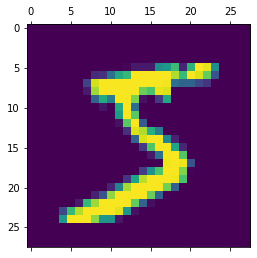

In [6]:
plt.matshow(X_train[0])

In [7]:
y_train[0]

5

In [13]:
X_train.shape

(60000, 28, 28)

# Data Scaling

In [18]:
X_train = X_train/255
X_test = X_test/255

In [15]:
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)

# Creating the neural network

In [22]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss = 'sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5


2022-03-15 19:17:58.123151: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 47040000 exceeds 10% of free system memory.


1875/1875 [==============================] - 15s 8ms/step - loss: 9.9364 - accuracy: 0.8393
Epoch 2/5
1875/1875 [==============================] - 9s 5ms/step - loss: 6.0969 - accuracy: 0.8797
Epoch 3/5
1875/1875 [==============================] - 12s 7ms/step - loss: 5.8095 - accuracy: 0.8824
Epoch 4/5
1875/1875 [==============================] - 15s 8ms/step - loss: 5.5456 - accuracy: 0.8843
Epoch 5/5
1875/1875 [==============================] - 11s 6ms/step - loss: 5.4558 - accuracy: 0.8864


# Evaluating on test dataset

In [43]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 3s 7ms/step - loss: 0.2904 - accuracy: 0.9276


[0.29037711024284363, 0.9276000261306763]

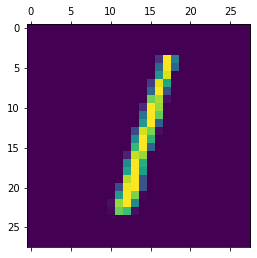

In [38]:
plt.matshow(X_test[2 ])

In [44]:
y_predict = model.predict(X_test_flattened)
y_predict[3]

array([1.0000000e+00, 3.5068472e-14, 1.0000000e+00, 1.0000000e+00,
       1.0000000e+00, 1.0000000e+00, 1.0000000e+00, 1.0000000e+00,
       1.0000000e+00, 1.0000000e+00], dtype=float32)

In [32]:
print("predicted digit : " + str(np.argmax(y_predict[3])))

predicted digit : 0


In [33]:
y_predicted_labels = [np.argmax(i) for i in y_predict]
y_predicted_labels[:5]

[3, 0, 1, 0, 0]

In [39]:
y_test[0:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [40]:
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 975,    0,    0,    2,    1,    2,    0,    0,    0,    0],
       [   2, 1130,    3,    0,    0,    0,    0,    0,    0,    0],
       [ 290,  325,  397,    7,    9,    2,    2,    0,    0,    0],
       [ 217,  192,  232,  365,    0,    3,    0,    1,    0,    0],
       [  66,   30,   50,  186,  646,    1,    1,    0,    2,    0],
       [ 233,   57,   48,  281,   73,  197,    2,    0,    1,    0],
       [ 180,   33,  537,   20,   64,   83,   41,    0,    0,    0],
       [  58,   48,   94,  590,   63,   72,    0,  103,    0,    0],
       [ 100,  245,  172,  248,   55,  123,    3,    2,   26,    0],
       [  27,   30,   24,  437,  425,   14,    1,   30,   16,    5]],
      dtype=int32)>

Text(69.0, 0.5, 'Truth')

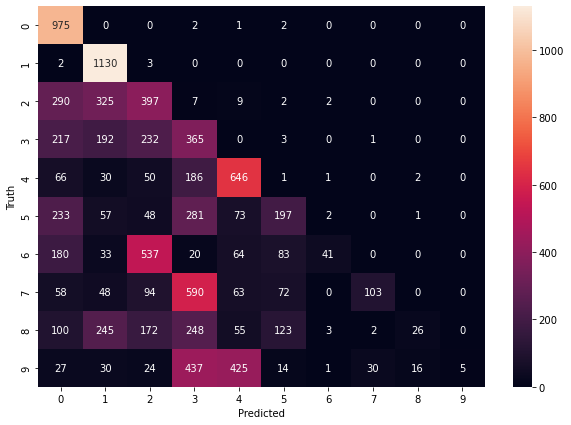

In [41]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

# Using a neural network with a hidden layer

In [42]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss = 'sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(X_train_flattened, y_train, epochs=5)

2022-03-15 22:17:18.189686: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 47040000 exceeds 10% of free system memory.


Epoch 1/5
1875/1875 [==============================] - 27s 13ms/step - loss: 2.5744 - accuracy: 0.8310
Epoch 2/5
1875/1875 [==============================] - 24s 13ms/step - loss: 0.4124 - accuracy: 0.8995
Epoch 3/5
1875/1875 [==============================] - 25s 13ms/step - loss: 0.3043 - accuracy: 0.9227
Epoch 4/5
1875/1875 [==============================] - 29s 15ms/step - loss: 0.2571 - accuracy: 0.9330
Epoch 5/5
1875/1875 [==============================] - 21s 11ms/step - loss: 0.2303 - accuracy: 0.9404


In [ ]:
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)
cm